<a href="https://colab.research.google.com/github/Divya-d14/Demand-Analysis-for-Shared-Electric-Cycles/blob/main/YuluElectricCyclesDemand_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Yulu - ElectricCycles Demand**

**About Yulu:**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to
revolutionize daily commutes by offering unique, sustainable transportation solutions
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles
specifically in the Indian  market

**Problem Statement:**


The Company wants to know
-  which variables are significant in predicting the demand for shared electric cycle in Indian market and
-  how well those variables describe the electric cycle demand






In [1]:
#Importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

##**EDA**

### **Introducing Data**

In [2]:
#loading the data to dataframe
df=pd.read_csv('https://raw.githubusercontent.com/Divya-d14/Demand-Analysis-for-Shared-Electric-Cycles/refs/heads/main/lr1_data.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.duplicated().any()

False

In [6]:
#Helper functions
def numeric_df_describe(df):
  d=df.describe().T
  d['unique'] = df.nunique()
  d["no. of nulls"] = df.shape[0]-d["count"]
  d["% of nulls"] = (d["no. of nulls"] / df.shape[0] * 100)
  return d.round(2)

numeric_df_describe(df)

,count,mean,std,min,25%,50%,75%,max,unique,no. of nulls,% of nulls
instant,730.0,365.50,210.88,1.00,183.25,365.50,547.75,730.00,730,0.0,0.0
season,730.0,2.50,1.11,1.00,2.00,3.00,3.00,4.00,4,0.0,0.0
yr,730.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00,2,0.0,0.0
mnth,730.0,6.53,3.45,1.00,4.00,7.00,10.00,12.00,12,0.0,0.0
holiday,730.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00,2,0.0,0.0
weekday,730.0,3.00,2.01,0.00,1.00,3.00,5.00,6.00,7,0.0,0.0
workingday,730.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00,2,0.0,0.0
weathersit,730.0,1.39,0.54,1.00,1.00,1.00,2.00,3.00,3,0.0,0.0
temp,730.0,20.32,7.51,2.42,13.81,20.47,26.88,35.33,498,0.0,0.0
atemp,730.0,23.73,8.15,3.95,16.89,24.37,30.45,42.04,689,0.0,0.0


In [7]:
df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
148,149,29-05-2018,2,0,5,0,0,0,1,27.367500,30.77750,81.8750,14.333846,2355,2433,4788
235,236,24-08-2018,3,0,8,0,3,1,1,27.606653,31.53460,60.5000,16.958236,949,4181,5130
477,478,23-04-2019,2,1,4,0,1,1,2,13.188347,15.05625,76.6667,20.334232,195,3019,3214
224,225,13-08-2018,3,0,8,0,6,0,2,28.119153,32.29290,72.9583,14.167418,1504,2646,4150
702,703,04-12-2019,4,1,12,0,2,1,1,19.509153,23.45270,73.3750,11.666643,551,6055,6606
177,178,27-06-2018,3,0,6,0,1,1,2,27.982500,31.85020,65.8333,7.208396,854,3854,4708
50,51,20-02-2018,1,0,2,0,0,0,1,11.693897,13.86650,40.7826,14.956745,639,1173,1812
117,118,28-04-2018,2,0,4,0,4,1,2,25.317500,28.94645,70.0833,21.500836,569,3489,4058
669,670,01-11-2019,4,1,11,0,4,1,2,14.999153,18.49710,58.1667,10.542182,466,5520,5986
550,551,05-07-2019,3,1,7,0,4,1,1,33.927500,38.06835,45.7917,12.999943,1405,4836,6241


**Initial Observations:**

- The dataset has 730 rows and 16 columns ( 8 continuous columns and 7 categorical columns and 1 datetime column)
 - No Null/missing values.
 - No duplicated data.

### **Data Cleaning and Transformation**

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#Dropping the 'instant' column as it serves as an index for rows and doesn't contribute significant information to the target cnt variable
#Removing the 'dteday' column as we already have more specific date-related data
df.drop(['instant','dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Updating the categorical columns to their appropriate data type
cat_con = ['season','yr','mnth','holiday','weekday','workingday', 'weathersit']
for i in cat_con:
  df[i]=df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 46.5 KB


In [11]:
# Data Mapping

season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(lambda x: season_mapping[x])

weather_mapping = {1:'clear', 2:'partly_clear', 3:'rain', 4:'intense'}
df['weathersit'] = df['weathersit'].map(lambda x: weather_mapping[x])

month_mapping = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'}
df['mnth'] = df['mnth'].map(lambda x: month_mapping[x])

weekday_mapping = {0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}
df['weekday'] = df['weekday'].map(lambda x: weekday_mapping[x])

In [12]:
df.sample(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
634,winter,1,sept,0,thu,1,partly_clear,26.650000,30.39875,69.0833,9.000914,751,6642,7393
587,fall,1,aug,0,sat,0,partly_clear,28.392500,31.91335,73.2917,13.834093,2247,4052,6299
255,fall,0,sept,0,tue,1,clear,26.684153,30.17770,71.2500,9.500868,701,4062,4763
689,winter,1,nov,0,wed,1,clear,14.486653,18.24460,61.3750,6.917482,615,4531,5146
680,winter,1,nov,1,mon,0,clear,19.885000,23.76915,74.1667,11.625639,1097,5172,6269
455,summer,1,apr,0,sun,0,partly_clear,17.459153,20.86435,67.6250,11.541889,2347,3694,6041
434,spring,1,mar,0,sun,0,clear,14.831299,17.98350,47.6957,14.913329,1658,3253,4911
702,winter,1,dec,0,tue,1,clear,19.509153,23.45270,73.3750,11.666643,551,6055,6606
555,fall,1,jul,0,tue,1,partly_clear,29.554153,33.23980,66.7500,10.166379,954,5336,6290
213,fall,0,aug,0,tue,1,clear,32.116653,35.35355,49.1250,13.791950,801,4044,4845


In [13]:
df.shape

(730, 14)

In [14]:
numeric_df_describe(df)

,count,mean,std,min,25%,50%,75%,max,unique,no. of nulls,% of nulls
temp,730.0,20.32,7.51,2.42,13.81,20.47,26.88,35.33,498,0.0,0.0
atemp,730.0,23.73,8.15,3.95,16.89,24.37,30.45,42.04,689,0.0,0.0
hum,730.0,62.77,14.24,0.00,52.00,62.62,72.99,97.25,594,0.0,0.0
windspeed,730.0,12.76,5.20,1.50,9.04,12.13,15.63,34.00,649,0.0,0.0
casual,730.0,849.25,686.48,2.00,316.25,717.00,1096.50,3410.00,605,0.0,0.0
registered,730.0,3658.76,1559.76,20.00,2502.25,3664.50,4783.25,6946.00,678,0.0,0.0
cnt,730.0,4508.01,1936.01,22.00,3169.75,4548.50,5966.00,8714.00,695,0.0,0.0


In [15]:
df.describe(exclude='number').T

,count,unique,top,freq
season,730,4,fall,188
yr,730,2,0,365
mnth,730,12,jan,62
holiday,730,2,0,709
weekday,730,7,sun,105
workingday,730,2,1,499
weathersit,730,3,clear,463


### **Visualizion of Data**

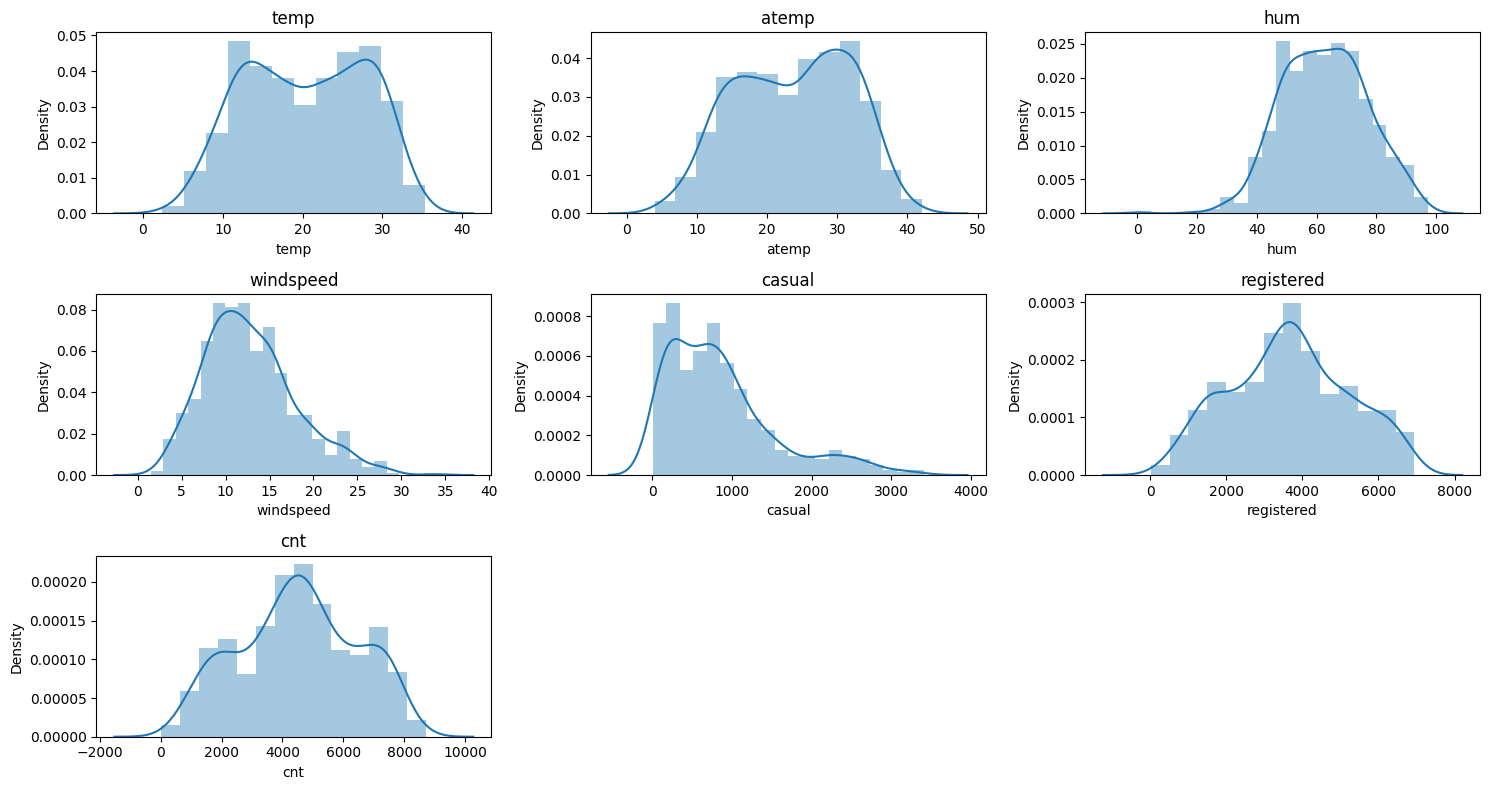

In [16]:
num_col = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,8))
for i,col in enumerate(num_col):
  plt.subplot(3,3,i+1)
  sns.distplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

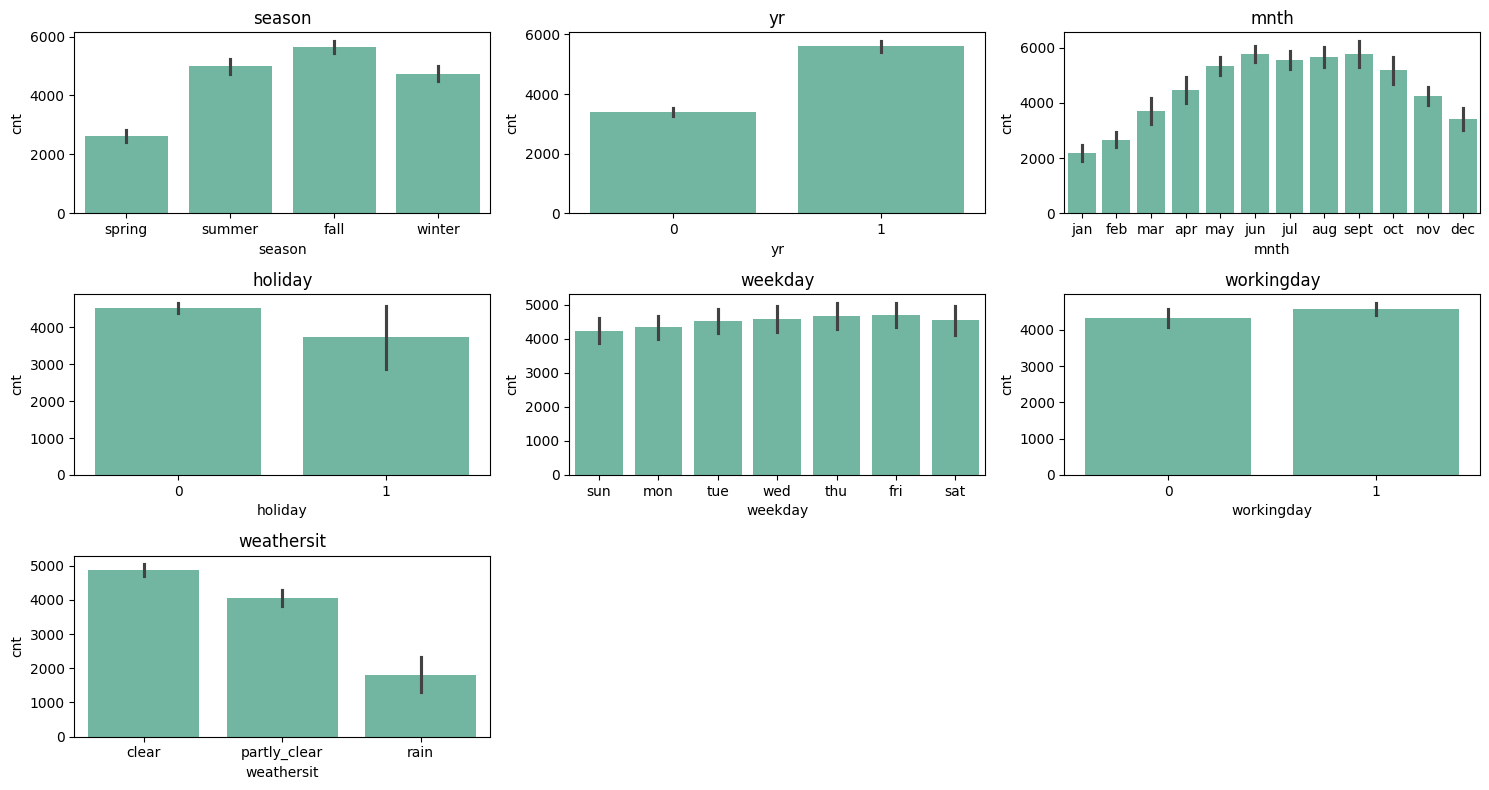

In [17]:
cat_col = df.select_dtypes(exclude=['number'])
sns.set_palette("Set2")
plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.barplot(data=df, x=col, y='cnt')
    plt.title(col)

plt.tight_layout()
plt.show()


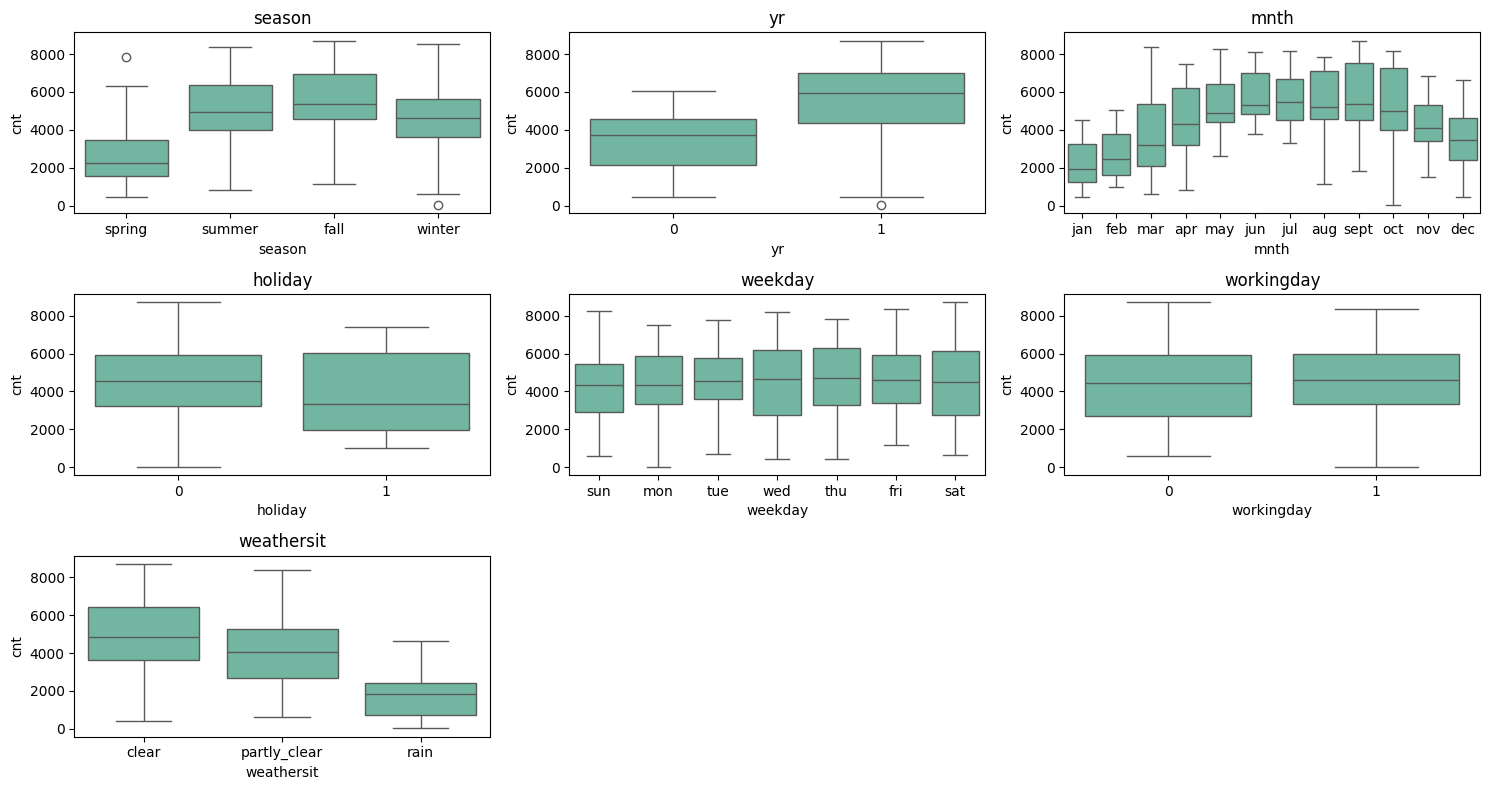

In [18]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, y='cnt')
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

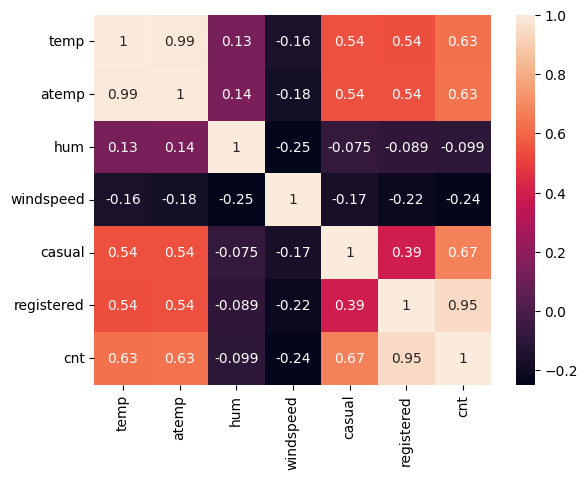

In [19]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

### Check if there is any significant difference between the no. of bike rides on working days and Nonworking days

**Setting up Null and Alternate Hypothesis:**

*H0 : No significant difference between no.of bike rides on weekdays and weekends*

*Ha : There is significant difference between no.of bike rides on weekdays and weekends*

- **Significance level : 0.05**

In [20]:
df.groupby('workingday')['cnt'].mean()

,cnt
workingday,
0,4330.168831
1,4590.332665


-  Using **2 sample Independent ttest** to check whether the mean of these two samples or values of these samples is significantly different

In [21]:
#calculate the p-value:

import scipy.stats as stats
tstats,pval = stats.ttest_ind(df[df['workingday']==0]['cnt'],df[df['workingday']==1]['cnt'])
print("pvalue: ",pval)

pvalue:  0.09130713322894805


*pvalue > 0.05*, hence *fail to reject null hypothesis*.

***No significant difference between bike rides on working and non working days or there is equal trend of bikes rented in both working and Non working days***

### Check if there is any significant difference between the no. of bike rides on holidays and non holidays?

**Setting up Null and Alternate Hypothesis:**

*H0 : No significant difference between no.of bike rides on holidays and Non holidays*

*Ha : There is significant difference between no.of bike rides on holidays and Non holidays*

- **Significance level : 0.05**

In [22]:
df.groupby('holiday')['cnt'].mean()

,cnt
holiday,
0,4530.90268
1,3735.00000


-  Using **2 sample Independent ttest** to check whether the mean of these two samples or values of these samples is significantly different

In [23]:
#calculate the p-value:

import scipy.stats as stats
tstats,pval = stats.ttest_ind(df[df['holiday']==0]['cnt'],df[df['holiday']==1]['cnt'])
print("pvalue: ",pval)

pvalue:  0.06332412651800291


*pvalue > 0.05*, hence *fail to reject null hypothesis*.

***No significant difference between bike rides on holidays and non holidays or there is equal trend of bikes rented in both holidays and Non holidays***

### Check if the Weather conditions are significantly different during different Seasons?

**Setting up Null and Alternate Hypothesis:**

*H0 : The Weather conditions are not significantly different during different Seasons*

*Ha : The Weather conditions are significantly different during different Seasons*

- **Significance level : 0.05**


**Applying chi-square test** since it is categorical - categorical with the significance level given as 0.05

In [24]:
#creating contingency table

contingency_table = pd.crosstab(df['weathersit'],df['season'])

contingency_table

season,spring,summer,fall,winter
weathersit,,,,
clear,111,113,136,103
partly_clear,65,68,48,65
rain,4,3,4,10


In [25]:
stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=14.737405580766552, pvalue=0.02240044098125438, dof=6, expected_freq=array([[114.16438356, 116.70136986, 119.23835616, 112.89589041],
       [ 60.65753425,  62.00547945,  63.35342466,  59.98356164],
       [  5.17808219,   5.29315068,   5.40821918,   5.12054795]]))

*pvalue < alpha*, hence rejecting null hypothesis

***The Weather conditions are significantly different during different Seasons***

### **Key takeaways from EDA**

- The **fall season** has the highest cycle count, followed by **summer** and **winter**.
- **Clear weather** conditions correlate with a higher count of cycles.
- There is no significant difference between **holiday** and **non-holiday** days.
- Similarly, **workdays** and **non-workdays** show no significant difference.
- **Year**, **month**, and **weekday** show notable differences in cycle count.
- Both 'temp' and 'atemp' show high correlation with 'cnt' (count), and since
 'casual' and 'registered' contribute to 'cnt', they also exhibit a high correlation

- Casual users are fewer on workdays, while there is a higher number of casual
  user sales during the fall season.
- High humidity correlates with lower sales.
- Higher temperatures tend to result in comparatively higher sales.

## **Data Preparation**

In [26]:
#Since 'holidays', 'nonholidays', 'weekdays', and 'weekends' do not show significant differences and do not provide valuable predictive power, they will be dropped
#Since 'atemp' is being explained by 'temp', dropping it
#Since 'casual' and 'registered' are directly included in the 'cnt' (count) column, they do not add unique predictive value and will therefore be removed


df.drop(['holiday','atemp','workingday','casual','registered'],axis=1,inplace=True)

In [27]:
'''Function to create the dummy variables. It creates the dummy variable, drops the first dummy variable,
concatenates this with the original dataset and removes the original categorical column'''

def create_dummy(dataframe, column_name):
  temp_df = pd.get_dummies(dataframe[column_name], drop_first = True)
  dataframe = pd.concat([dataframe, temp_df], axis = 1)
  dataframe.drop([column_name], axis = 1, inplace = True)
  return dataframe

In [28]:
# Categorical columns for which we need to create the dummy variables
cat_cols = ['season','mnth','weekday','weathersit']

# Creates the dummy variables
for col in cat_cols:
    df = create_dummy(df, col)
df.head()

,yr,temp,hum,windspeed,cnt,summer,fall,winter,feb,mar,...,nov,dec,mon,tue,wed,thu,fri,sat,partly_clear,rain
0,0,14.110847,80.5833,10.749882,985,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,14.902598,69.6087,16.652113,801,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,8.050924,43.7273,16.636703,1349,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,8.200000,59.0435,10.739832,1562,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,9.305237,43.6957,12.522300,1600,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [29]:
bool_col = df.select_dtypes(include=['bool']).columns
for i in bool_col:
  df[i] = df[i].astype(int)

In [30]:
df.sample(10)

,yr,temp,hum,windspeed,cnt,summer,fall,winter,feb,mar,...,nov,dec,mon,tue,wed,thu,fri,sat,partly_clear,rain
380,1,7.790000,52.2500,15.500986,2298,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
559,1,28.836653,69.9167,9.626493,6969,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
483,1,18.791653,58.7083,7.832836,6304,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,1,21.080847,63.0833,12.584007,7691,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,8.050924,43.7273,16.636703,1349,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
519,1,24.497500,48.7083,19.083811,6998,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
324,0,18.347500,91.0000,9.249618,2765,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
636,1,22.242500,54.2917,15.249468,8555,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
510,1,28.392500,73.2500,13.332464,6536,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
428,1,9.976653,50.6250,15.333486,3333,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [31]:
df_train,df_test = train_test_split(df,train_size=0.70,random_state=100)

In [32]:
# Scaling the numeric columns
scaler = MinMaxScaler()
# Get numerical columns, excluding 'cnt'
num_cols = df_train.select_dtypes(include=['float64']).columns

df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Separately handle 'cnt' int64 scaling
df_test['cnt'] = scaler.fit_transform(df_test[['cnt']])
df_train['cnt'] = scaler.fit_transform(df_train[['cnt']])

In [33]:
df_train.head()

,yr,temp,hum,windspeed,cnt,summer,fall,winter,feb,mar,...,nov,dec,mon,tue,wed,thu,fri,sat,partly_clear,rain
576,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
728,1,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
df_test.head()

,yr,temp,hum,windspeed,cnt,summer,fall,winter,feb,mar,...,nov,dec,mon,tue,wed,thu,fri,sat,partly_clear,rain
184,0,0.831783,0.657364,0.084219,0.704300,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0.901354,0.610133,0.153728,0.725421,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0.511964,0.837699,0.334206,0.278853,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0.881625,0.437098,0.339570,0.545512,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0.817246,0.314298,0.537414,0.569148,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
X_train = df_train.drop(['cnt'],axis=1)
y_train = df_train['cnt']
X_test = df_test.drop(['cnt'],axis=1)
y_test = df_test['cnt']

## **Model Building using RFE**

### **Building the model**

In [36]:
#Buildinng the RFE and selecting the top-15 variables from the RFE

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [37]:
#Seeing the RFE Results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 3),
 ('winter', True, 1),
 ('feb', False, 13),
 ('mar', False, 4),
 ('apr', False, 7),
 ('may', False, 5),
 ('jun', False, 6),
 ('jul', False, 14),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', False, 2),
 ('nov', False, 17),
 ('dec', False, 16),
 ('mon', False, 15),
 ('tue', False, 12),
 ('wed', False, 10),
 ('thu', False, 11),
 ('fri', False, 9),
 ('sat', False, 8),
 ('partly_clear', True, 1),
 ('rain', True, 1)]

In [38]:
rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'aug', 'sept',
       'partly_clear', 'rain'],
      dtype='object')


In [39]:
print(X_train.columns[~rfe.support_])

Index(['fall', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'oct', 'nov', 'dec',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat'],
      dtype='object')


In [40]:
# Taking top 10 independent variables from the RFE
X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]

# Adding the constant to the dataset
X_train_rfe_sm = sm.add_constant(X_train_rfe)
X_test_rfe_sm = sm.add_constant(X_test_rfe)

#Building the model
lr = sm.OLS(y_train,X_train_rfe_sm)
lr_model = lr.fit()

#Checking the summary of model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.5
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          4.10e-189
Time:                        09:06:23   Log-Likelihood:                 500.87
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2283      0.027      8.380   

 R-squared tells us how well the model explains the variance in the dependent variable, while adjusted R-squared adjusts for the number of predictors. Here, these two values are similar, it indicates that adding more variables hasn’t improved the model significantly, meaning we’ve struck a good balance without overfitting. Essentially, this shows that the chosen predictors are relevant and that the model is well-constructed. let us check vif

In [41]:
# Calculating the VIF Values
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_sm.values, i) for i in range(X_train_rfe_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.10
3,hum,1.86
9,partly_clear,1.55
2,temp,1.54
7,aug,1.44
5,summer,1.37
6,winter,1.32
10,rain,1.23
8,sept,1.21
4,windspeed,1.18


In [42]:
X_train_rfe_sm.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'aug',
       'sept', 'partly_clear', 'rain'],
      dtype='object')

All the columns has the VIF value less than 5, which is nothing but the independent variables are not heavily correlated with the other independent variables.

Now, we got the model, where all the p-values are less than the 0.05 and the R-squared is very close with the adjusted R-squares. And the VIF will decrease or not change when we drop the variable but it won't increase. So we can freeze the model here.

And proceed with the Residual analysis.

### **Residual analysis and evaluation**

<Axes: ylabel='Density'>

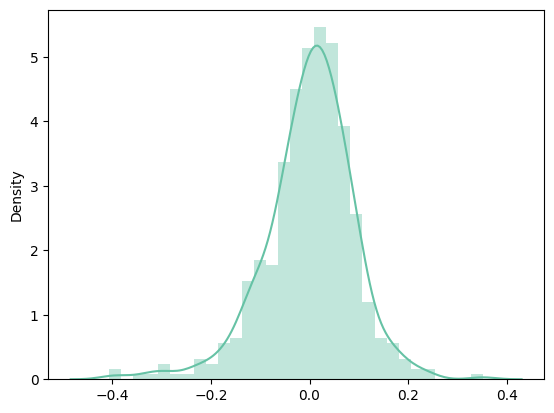

In [43]:
y_pred_train = lr_model.predict(X_train_rfe_sm)
res1 = (y_train - y_pred_train)
sns.distplot(res1)

<Axes: ylabel='Density'>

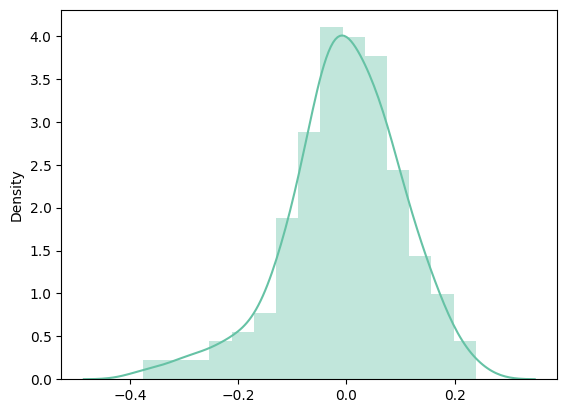

In [44]:
y_pred_test = lr_model.predict(X_test_rfe_sm)
res2 = (y_test - y_pred_test)
sns.distplot(res2)

From the above plots, it is clear that the error terms are centered around 0 (mean is 0) and following the normal distribution.

In [45]:
r2_score(y_train,y_pred_train)

0.8366154358465681

In [46]:
r2_score(y_test,y_pred_test)

0.8014655318667716

The R^2 of the test data is close to the train data's R^2. So our model is working fine

This is the simplest model that we could build.

Therefore, the final model includes the 10 variables listed above, and can be used for predicting the daily bike rental count.